## Q.11. 平滑化フィルタ

平滑化フィルタ(3x3)を実装せよ。

平滑化フィルタはフィルタ内の画素の平均値を出力するフィルタである。

|入力 (imori.jpg)|出力 (answers_image/answer_11.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_11.jpg)|

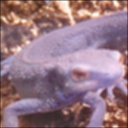

In [1]:
import cv2
import numpy as np
from PIL import Image

# Read image
img = cv2.imread("./imori.jpg")
H, W, C = img.shape


# Median Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.mean(tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

## Q.12. モーションフィルタ

モーションフィルタ(3x3)を実装せよ。

モーションフィルタとは対角方向の平均値を取るフィルタであり、次式で定義される。

```bash
  1/3  0   0
[  0  1/3  0 ]
   0   0  1/3
```

|入力 (imori.jpg)|出力 (answers_image/answer_12.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_12.jpg)|

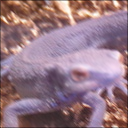

In [2]:
# Read image
img = cv2.imread("./imori.jpg")
H, W, C = img.shape


# Median Filter
K_size = 3

K = np.diag( [1] * K_size ).astype(float)
K /= K_size

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

## Q.13. MAX-MINフィルタ

MAX-MINフィルタ(3x3)を実装せよ。

MAX-MINフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、**エッジ検出**のフィルタの一つである。
エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を**特徴抽出**と呼ぶ。
エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

|入力 (imori.jpg)|出力 (answers_image/answer_13.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_13.jpg)|

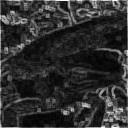

In [3]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Max-Min Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.max(tmp[y:y+K_size, x:x+K_size]) - np.min(tmp[y:y+K_size, x:x+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

## Q.14. 微分フィルタ

微分フィルタ(3x3)を実装せよ。

微分フィルタは輝度の急激な変化が起こっている部分のエッジを取り出すフィルタであり、隣り合う画素同士の差を取る。

```bash
    (a)縦方向         (b)横方向
      0 -1  0            0 0 0
K = [ 0  1  0 ]   K = [ -1 1 0 ]
      0  0  0            0 0 0
```

|入力 (imori.jpg)|出力・縦方向 (answers_image/answer_14_v.jpg)|出力・横方向 (answers_image/answer_14_h.jpg)|
|:---:|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_14_v.jpg)|![](answers_image/answer_14_h.jpg)|

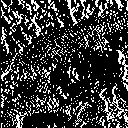

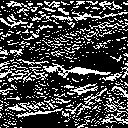

In [4]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

## Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad * 2, W + pad * 2), dtype=float)
out_v = np.zeros((H + pad * 2, W + pad * 2), dtype=float)
out_h[pad:pad + H, pad:pad + W] = gray.copy().astype(float)
out_v[pad:pad + H, pad:pad + W] = gray.copy().astype(float)

tmp = out_h.copy()



## Sobel vertical
K_v = [[0., -1., 0.], [0., 1., 0.], [0., 0., 0.]]
## Sobel horizontal
K_h = [[0., 0., 0.], [-1., 1., 0.], [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_h[pad + y, pad + x] = np.mean(K_h * (tmp[y:y + K_size, x:x + K_size]))
        out_v[pad + y, pad + x] = np.mean(K_v * (tmp[y:y + K_size, x:x + K_size]))

out_h = out_h[pad:pad + H, pad:pad + W].astype(np.uint8)
out_v = out_v[pad:pad + H, pad:pad + W].astype(np.uint8)

display(Image.fromarray(out_h))
display(Image.fromarray(out_v))

## Q.15. Sobelフィルタ

Sobelフィルタ(3x3)を実装せよ。

ソーベルフィルタ(Sobelフィルタ)は特定方向（縦や横）のエッジのみを抽出するフィルタであり、次式でそれぞれ定義される。

```bash
    (a)縦方向       (b)横方向
       1  2  1           1  0 -1
K = [  0  0  0 ]   K = [ 2  0 -2 ]
      -1 -2 -1           1  0 -1
```

|入力 (imori.jpg)|出力・縦方向 (answers_image/answer_15_v.jpg)|出力・横方向 (answers_image/answer_15_h.jpg)|
|:---:|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_15_v.jpg)|![](answers_image/answer_15_h.jpg)|

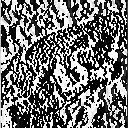

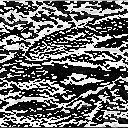

In [5]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Sobel Filter
K_size = 3

# Zero padding
pad = K_size//2
out_h = np.zeros((H + pad*2, W + pad*2), dtype=float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype=float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out_h.copy()

# Sobel Horizontal
K_h = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]
# Sobel Vertical
K_v = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out_h[pad+y, pad+x] = np.mean(K_h * (tmp[y:y+K_size, x:x+K_size]))
        out_v[pad+y, pad+x] = np.mean(K_v * (tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out_h))
display(Image.fromarray(out_v))

## Q.16. Prewittフィルタ

Prewittフィルタ(3x3)を実装せよ。

Prewittフィルタはエッジ抽出フィルタの一種であり、次式で定義される。

```bash
    (a)縦方向          (b)横方向
      -1 -1 -1          -1 0 1
K = [  0  0  0 ]  K = [ -1 0 1 ]
       1  1  1          -1 0 1
```

|入力 (imori.jpg)|出力・縦方向 (answers_image/answer_16_v.jpg)|出力・横方向 (answers_image/answer_16_h.jpg)|
|:---:|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_16_v.jpg)|![](answers_image/answer_16_h.jpg)|

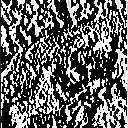

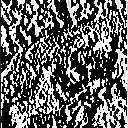

In [6]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

## Zero padding
pad = K_size // 2
out_h = np.zeros((H + pad*2, W + pad*2), dtype=float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype=float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out_h.copy()

## Prewitt Filter Horizontal
K_h = [[-1., 0., 1.],[-1., 0., 1.],[-1., 0., 1.]]
## Prewitt Filter Vertical
K_v = [[-1., -1., -1.],[0., 0., 0.], [1., 1., 1.]]

for y in range(H):
    for x in range(W):
        out_h[pad+y, pad+x] = np.mean(K_h * (tmp[y:y+K_size, x:x+K_size]))
        out_v[pad+y, pad+x] = np.mean(K_h * (tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out_h))
display(Image.fromarray(out_v))

## Q.17. Laplacianフィルタ

Laplacianフィルタを実装せよ。

Laplacian（ラプラシアン）フィルタとは輝度の二次微分をとることでエッジ検出を行うフィルタである。

デジタル画像は離散データであるので、x方向・y方向の一次微分は、それぞれ次式で表される。

```bash
Ix(x,y) = (I(x+1, y) - I(x,y)) / ((x+1)-x) = I(x+1, y) - I(x,y)
Iy(x,y) = (I(x, y+1) - I(x,y)) / ((y+1)-y) = I(x, y+1) - I(x,y)
```

さらに二次微分は、次式で表される。

```bash
Ixx(x,y) = (Ix(x,y) - Ix(x-1,y)) / ((x+1)-x) = Ix(x,y) - Ix(x-1,y)
         = (I(x+1, y) - I(x,y)) - (I(x, y) - I(x-1,y))
         = I(x+1,y) - 2 * I(x,y) + I(x-1,y)
Iyy(x,y) = ... = I(x,y+1) - 2 * I(x,y) + I(x,y-1)
```

これらより、ラプラシアン は次式で定義される。

```bash
D^2 I(x,y) = Ixx(x,y) + Iyy(x,y)
           = I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)
```

これをカーネル化すると、次のようになる。

```bash
      0  1  0
K = [ 1 -4  1 ]
      0  1  0
```

|入力 (imori.jpg)|出力(answers_image/answer_17.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_17.jpg)||

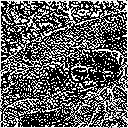

In [7]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out.copy()

## Laplacian vertical
K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.mean(K * (tmp[y:y+K_size, x:x+K_size]))

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

## Q.18. Embossフィルタ

Embossフィルタを実装せよ。

Embossフィルタとは輪郭部分を浮き出しにするフィルタで、次式で定義される。

```bash
      -2 -1  0
K = [ -1  1  1 ]
       0  1  2
```

|入力 (imori.jpg)|出力(answers_image/answer_18.jpg)|
|:---:|:---:|
|![](imori.jpg)|![](answers_image/answer_18.jpg)|

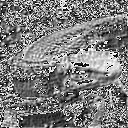

In [8]:
# Read image
img = cv2.imread("./imori.jpg").astype(float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# sobel Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out.copy()

## Emboss vertical
K = [[-2., -1., 0.],[-1., 1., 1.], [0., 1., 2.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * (tmp[y:y+K_size, x:x+K_size]))

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

# Q.19. LoGフィルタ

LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、*imori_noise.jpg*のエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

Laplcianフィルタは二次微分をとるのでノイズが強調されるのを防ぐために、予めGaussianフィルタでノイズを抑える。

LoGフィルタは次式で定義される。

```bash
LoG(x,y) = (x^2 + y^2 - sigma^2) / (2 * pi * sigma^6) * exp(-(x^2+y^2) / (2*sigma^2))
```

|入力 (imori_noise.jpg)|出力 (answers_image/answer_19.jpg) |
|:---:|:---:|
|![](imori_noise.jpg)|![](answers_image/answer_19.jpg)|

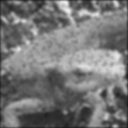

In [9]:
# Read image
img = cv2.imread("./imori_noise.jpg")
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

# Gaussian Filter
K_size = 5
s = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(float)
tmp = out.copy()

## Kernel
K = np.zeros((K_size, K_size), dtype=float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = (x**2 + y**2 - s**2) * np.exp( -(x**2 + y**2) / (2* (s**2)))
K /= (2 * np.pi * (s**6))
K /= K.sum()

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

display(Image.fromarray(out))

## Q.20. ヒストグラム表示

matplotlibを用いて*imori_dark.jpg*のヒストグラムを表示せよ。

ヒストグラムとは画素の出現回数をグラフにしたものである。
matplotlibではhist()という関数がすでにあるので、それを利用する。

|入力 (imori_dark.jpg)|出力 (answers_image/answer_20.png) |
|:---:|:---:|
|![](imori_dark.jpg)|![](answers_image/answer_20.png)|


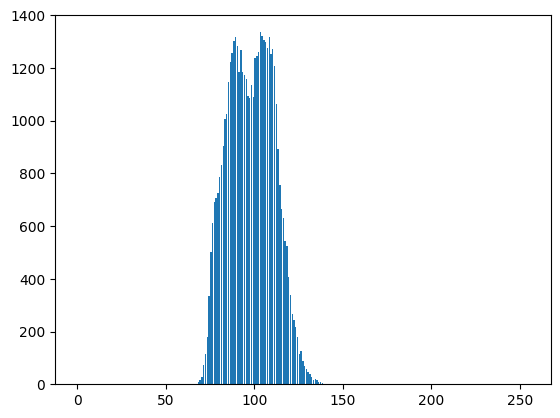

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("./imori_dark.jpg").astype(float)

# Display histogram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()